## Name: Asad Ansari

## 1. Setup
### Uncomment and run the line below if your environment is not already setup properly.

In [1]:
# uncomment the line below and run this cell to install required packages if
# you do not have them installed already.

# %pip install pandas numpy scipy matplotlib openpyxl seaborn pyarrow


## 2. Process Data & Funtions

In [2]:
import openpyxl
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


####=====####
####SETUP####
####=====####
# expects data file to be named INF2178_A1_data.xlsx and stored in the
# data directory. If you have changed the filename please change it in the
# variable data_file_name below.
data_file_name = "INF2178_A1_data.xlsx"
df = pd.read_excel(data_file_name)
# notebook_path = Path(IPython.get_ipython().starting_dir)
# data_file_path = str(notebook_path) + "\\data\\" + data_file_name
# df = pd.read_excel(data_file_path)



##=========##
##FUNCTIONS##
##=========##

# given a list of columns (lst_of_cols) and a conversion_type, convert values
# in the columns to the conversion_type within a data_frame.
def convert_cols(data_frame, conversion_type, lst_of_cols):
    if conversion_type.lower() == "number":
        for col in lst_of_cols:
            data_frame[col] = pd.to_numeric(df[col], errors="coerce")
    if conversion_type.lower() == "datetime":
        for col in lst_of_cols:
            data_frame[col] = pd.to_datetime(df[col], errors="coerce")

# given a data_frame and a list of columns (lst_of_cols) fill in any empty
# cells with "NA".
def fill_empty_cells(data_frame, lst_of_cols):
    data_frame[lst_of_cols] = data_frame[lst_of_cols].fillna("NA")

# given a data_frame and a col_name return a dataframe that returns the COUNT
# for each value in the col_name.
def get_count(data_frame, col_name, show_index):
    distribution = data_frame[col_name].value_counts()
    distribution_df = distribution.reset_index()
    distribution_df.columns = [col_name, "COUNT"]
    if show_index == True:
        distribution_df.index = range(1, len(distribution_df) + 1)
        return distribution_df
    return distribution_df.style.hide(axis="index")

# get the unique count for a column.
def get_count_unique(data_frame, col_name, show_index, drop_na=False):
    distribution = data_frame.groupby(col_name, dropna=drop_na)["PROGRAM_ID"].nunique()
    distribution_df = distribution.reset_index()
    distribution_df.columns = [col_name, "UNIQUE_COUNT"]
    if show_index == True:
        distribution_df.index = range(1, len(distribution_df) + 1)
        return distribution_df
    return distribution_df.style.hide(axis="index")

# get a category by category count for a column in a dataframe.
def get_catg_by_catg_count(data_frame, col_name_one, col_name_two, show_index, drop_na=False):
    distribution = data_frame.groupby(col_name_one, dropna=drop_na)[col_name_two].sum()
    distribution_df = distribution.reset_index()
    distribution_df.columns = [col_name_one, col_name_two]
    if show_index == True:
        distribution_df.index = range(1, len(distribution_df) + 1)
        return distribution_df
    return distribution_df.style.hide(axis="index")

# get a specific value in a row within a dataframe.
def get_value_in_df_row(data_frame, col_name_one, col_name_two, target):
    row_val = data_frame.loc[data_frame[col_name_one] == target, col_name_two].iloc[0]
    return row_val

# calculate the central tendencies of columns within a dataframe.
def cal_central_tend(data_frame, lst_of_cols):
    for col in lst_of_cols:
        mean = data_frame[col].mean()
        median = data_frame[col].median()
        mode = data_frame[col].mode()

# calculate the mean of a column over a time period such as over a month or
# over days.
def get_stat_by_date(data_frame, group_by_col, time_period, stat_for_col, stat_type, group_name, stat_col_name):
    if stat_type.lower() == "mean":
        the_mean = data_frame.groupby(data_frame[group_by_col].dt.to_period(time_period))[stat_for_col].mean().reset_index().rename(columns={group_by_col: group_name, stat_for_col: stat_col_name})
        the_mean_df = pd.DataFrame(the_mean)
        the_mean_df.index = range(1, len(the_mean_df) + 1)
    return the_mean_df

# return the mean, meidan, quartlies, iqr, histogram, and boxplot of a column
# within a dataframe.
def is_col_normal(data_frame, col_name):
    cleaned_df = data_frame[col_name]
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_df, kde=True, bins=30)
    plt.title(f"Histogram of {col_name}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_df)
    plt.title(f"Boxplot of {col_name}")

    mean = cleaned_df.mean()
    median = cleaned_df.median()
    quartiles = cleaned_df.quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    stats = {"Mean":mean,"Median":median,"Quartile1":quartiles[0.25],"Quartile3":quartiles[0.75],"IQR":iqr}

    plt.tight_layout()
    plt.show()
    return stats

# draw a histogram of a a column in a dataframe.
def draw_histogram(data_frame, col_name, filter, filter_by, title, x_label, y_label, legend_title=None):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))
    sns.histplot(data=data_frame[data_frame[filter] == filter_by], x=col_name, hue=data_frame["SECTOR"], kde=True)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if legend_title != None:
        plt.legend(title=legend_title)
    return plt

# perform a Welch's t-test between two groups in a dataframe.
# a student t-test can be perform by passing True for the dont_use_welchs
# parameter.
def perform_t_test(data_frame, group_one_col, group_two_col, restriction_one, restriction_two, dont_use_welchs=False):
    group_one_data = data_frame[data_frame[group_one_col] == restriction_one][group_two_col]
    group_two_data = data_frame[data_frame[group_one_col] == restriction_two][group_two_col]
    t_stat, p_value = stats.ttest_ind(group_one_data.dropna(), group_two_data.dropna(), equal_var=dont_use_welchs)
    return {"T-Statistic:":t_stat, "P-Value:":p_value}




# typecast cells in columns with numerical content to number
convert_cols(df, "number", ["SERVICE_USER_COUNT", "CAPACITY_ACTUAL_BED",
                     "OCCUPIED_BEDS", "CAPACITY_ACTUAL_ROOM",
                     "OCCUPIED_ROOMS"])

# typecast cells in columns with datetime content to datetime
convert_cols(df, "datetime", ["OCCUPANCY_DATE"])

# fill empty cells with NA so we can account for them in the analysis
fill_empty_cells(df,["PROGRAM_NAME", "OVERNIGHT_SERVICE_TYPE", "PROGRAM_AREA"])

# insert two additional columns in the dataframe to calculate
# BED_OCCUPANCY_RATE and ROOM_OCCUPANCY_RATE
df.insert(12,"BED_OCCUPANCY_RATE", None)
df.insert(15,"ROOM_OCCUPANCY_RATE", None)

# ensure that empty cells are not used to calculate BED_OCCUPANCY_RATE
bed_restrictions = df["OCCUPIED_BEDS"].notna() \
    & df["CAPACITY_ACTUAL_BED"].notna()

# caclulate BED_OCCUPANCY_RATE
df["BED_OCCUPANCY_RATE"] = np.where(bed_restrictions,
                                    df["OCCUPIED_BEDS"] / df["CAPACITY_ACTUAL_BED"], np.nan)

# ensure that empty cells are not used to calculate ROOM_OCCUPANCY_RATE
room_restrictions = df["OCCUPIED_ROOMS"].notna() \
    & df["CAPACITY_ACTUAL_ROOM"].notna()

# caclulate ROOM_OCCUPANCY_RATE
df["ROOM_OCCUPANCY_RATE"] = np.where(room_restrictions, df["OCCUPIED_ROOMS"] / df["CAPACITY_ACTUAL_ROOM"], np.nan)


## 3. Descriptive Statistics

In [3]:
total_number_of_records = len(df)
print(f"There are {total_number_of_records} records in the sample data.")


There are 50944 records in the sample data.


In [4]:
org_count = get_count_unique(df, "ORGANIZATION_NAME", True, False)
org_count


,ORGANIZATION_NAME,UNIQUE_COUNT
1,COSTI Immigrant Services,13
2,Christie Ossington Neighbourhood Centre,4
3,"Christie Refugee Welcome Centre, Inc.",1
4,City of Toronto,45
5,Cornerstone Place,1
6,Covenant House Toronto,4
7,Dixon Hall,7
8,Eva's Initiatives,5
9,Fife House Foundation,2
10,Fred Victor Centre,8


In [5]:
sum_unique_counts_excluding_city = org_count[org_count["ORGANIZATION_NAME"] != "City of Toronto"]["UNIQUE_COUNT"].sum()

sum_unique_counts_only_city = org_count[org_count["ORGANIZATION_NAME"] == "City of Toronto"]["UNIQUE_COUNT"].sum()

print("The City of Toronto adminstered a total of", sum_unique_counts_only_city, "unique programs.")

print("A a total of", sum_unique_counts_excluding_city, "programs were administered by various other charitable organizations and non-profits.")


The City of Toronto adminstered a total of 45 unique programs.
A a total of 124 programs were administered by various other charitable organizations and non-profits.


In [6]:
print("The organization with most number of unique programs after the City of Toronto are listed below:")
sum_other_orgs = org_count[(org_count["UNIQUE_COUNT"] >= 10) & (org_count['ORGANIZATION_NAME'] != 'City of Toronto')]
sum_other_orgs


The organization with most number of unique programs after the City of Toronto are listed below:


,ORGANIZATION_NAME,UNIQUE_COUNT
1,COSTI Immigrant Services,13
13,Homes First Society,19
25,The Salvation Army of Canada,11


In [7]:
total_other = sum_other_orgs["UNIQUE_COUNT"].sum()
print("These amount to", total_other, "programs in total.")


These amount to 43 programs in total.


In [8]:
unique_program_ids_count = df["PROGRAM_ID"].nunique()
unique_org_name_count = df["ORGANIZATION_NAME"].nunique()

print("In 2021, there were", unique_org_name_count, "different organizations administering",unique_program_ids_count,"shelter programs in Toronto.")


In 2021, there were 35 different organizations administering 169 shelter programs in Toronto.


In [9]:
sector_unique_count = get_count_unique(df, "SECTOR", True, False)
sector_unique_count


,SECTOR,UNIQUE_COUNT
1,Families,21
2,Men,39
3,Mixed Adult,53
4,Women,31
5,Youth,25


In [10]:
families = get_value_in_df_row(sector_unique_count,"SECTOR", "UNIQUE_COUNT", "Families")

men = get_value_in_df_row(sector_unique_count,"SECTOR", "UNIQUE_COUNT", "Men")

women = get_value_in_df_row(sector_unique_count,"SECTOR", "UNIQUE_COUNT", "Women")

mixed_adult = get_value_in_df_row(sector_unique_count,"SECTOR", "UNIQUE_COUNT", "Mixed Adult")

youth = get_value_in_df_row(sector_unique_count,"SECTOR", "UNIQUE_COUNT", "Youth")

print("Of the", org_count["UNIQUE_COUNT"].sum(), "programs:\n",families, "were targeted towards families.\n", men, "were targeted towards men.\n", mixed_adult, "were targeted towards mixed adults.\n", women, "were targeted towards women.\n", youth, "were tageted towards youth.")


Of the 169 programs:
 21 were targeted towards families.
 39 were targeted towards men.
 53 were targeted towards mixed adults.
 31 were targeted towards women.
 25 were tageted towards youth.


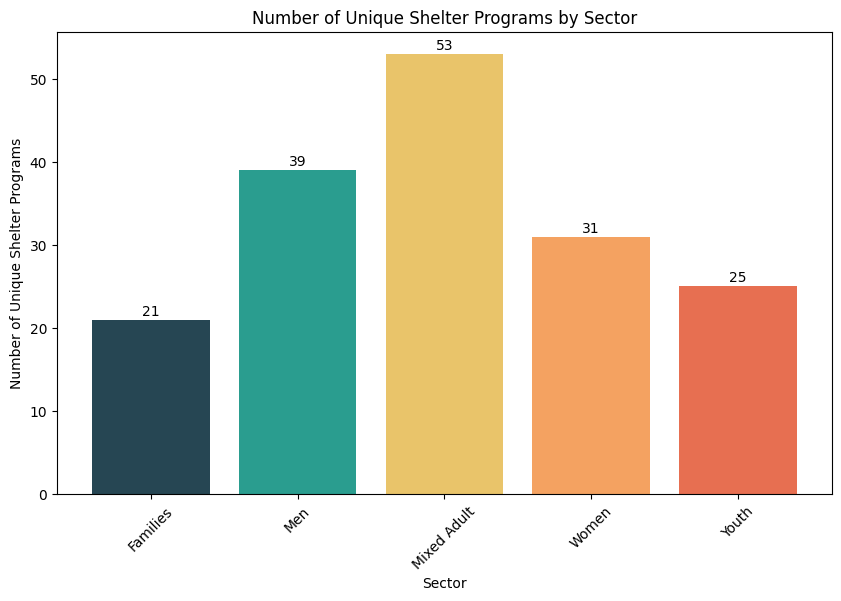

In [11]:
bar_colours = ["#264653", "#2A9D8F", "#E9C46A", "#F4A261", "#E76F51"]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(sector_unique_count["SECTOR"], sector_unique_count["UNIQUE_COUNT"], color=bar_colours)
ax.bar_label(bars, padding=1)
ax.set_title("Number of Unique Shelter Programs by Sector")
ax.set_xlabel("Sector")
ax.set_ylabel("Number of Unique Shelter Programs")
plt.xticks(rotation=45)
plt.show()


In [12]:
sector_by_service_count = get_catg_by_catg_count(df, "SECTOR", "SERVICE_USER_COUNT", True, False)

sector_by_service_count


,SECTOR,SERVICE_USER_COUNT
1,Families,449954
2,Men,488043
3,Mixed Adult,964801
4,Women,265299
5,Youth,161428


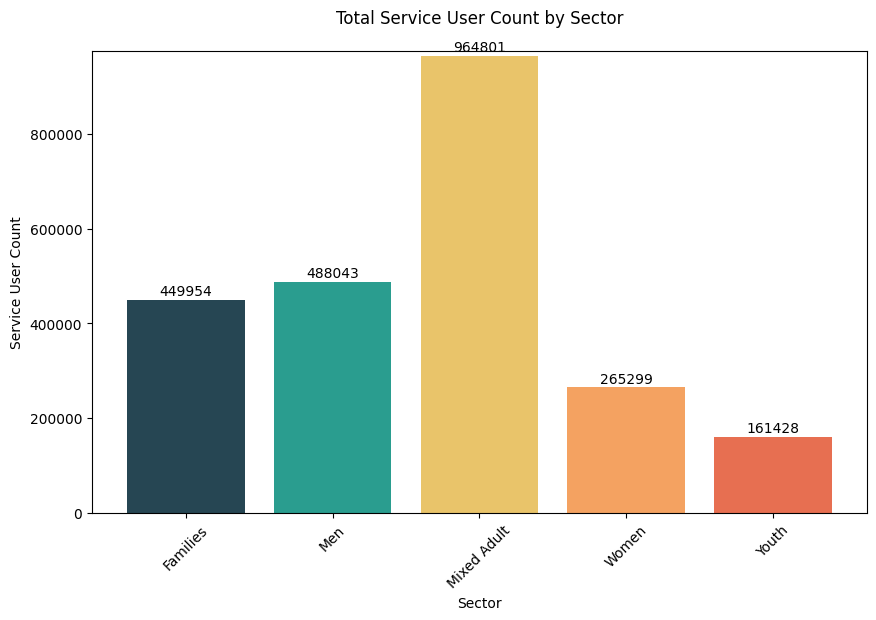

In [13]:
bar_colours = ["#264653", "#2A9D8F", "#E9C46A", "#F4A261", "#E76F51"]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(sector_by_service_count["SECTOR"], sector_by_service_count["SERVICE_USER_COUNT"], color=bar_colours)
ax.bar_label(bars, padding=1)
ax.set_title("Total Service User Count by Sector", pad=20)
ax.set_xlabel("Sector")
ax.set_ylabel("Service User Count")
plt.xticks(rotation=45)
ax.set_ylim(0, sector_by_service_count["SERVICE_USER_COUNT"].max() + 10000)
plt.show()


In [14]:
print("The mixed adult sector had the largest number of patrons stays in an overnight program.")


The mixed adult sector had the largest number of patrons stays in an overnight program.


In [15]:
unique_program_id_by_model = get_count_unique(df,"PROGRAM_MODEL",True,False)
unique_program_id_by_model


,PROGRAM_MODEL,UNIQUE_COUNT
1,Emergency,140
2,Transitional,28
3,NaN,1


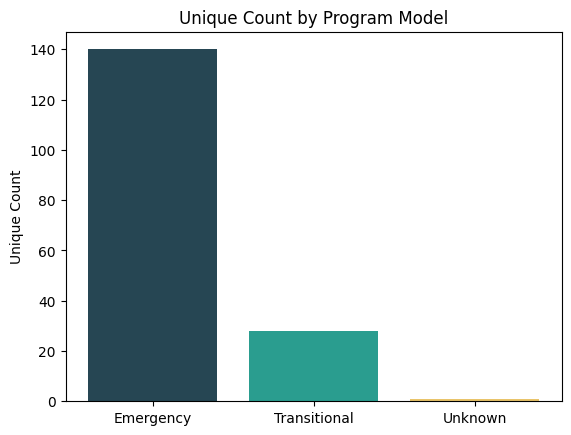

In [16]:
bar_colours = ["#264653", "#2A9D8F", "#E9C46A"]

unique_program_id_by_model_fix_na = unique_program_id_by_model.fillna("Unknown")
fig, ax = plt.subplots()
models = unique_program_id_by_model_fix_na["PROGRAM_MODEL"]
counts = unique_program_id_by_model_fix_na["UNIQUE_COUNT"]
ax.bar(models, counts, label="Program Model Counts", color=bar_colours)
ax.set_ylabel("Unique Count")
ax.set_title("Unique Count by Program Model")
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)
plt.show()


In [17]:
program_model_unknown_id = df[pd.isnull(df['PROGRAM_MODEL'])]['PROGRAM_ID'].unique()
print("The program with id", program_model_unknown_id[0], "has an unknown progam model.")


The program with id 16631 has an unknown progam model.


In [18]:
# checking earlier analysis
program_id_group_count = df.groupby("PROGRAM_ID")["SERVICE_USER_COUNT"].sum().reset_index()
program_id_group_count.index = range(1, len(program_id_group_count) + 1)
program_id_group_count


,PROGRAM_ID,SERVICE_USER_COUNT
1,11791,14828
2,11794,12754
3,11798,19962
4,11799,1232
5,11811,20166
...,...,...
165,16534,648
166,16535,1931
167,16551,11093
168,16611,1026


In [19]:
total_number_of_serviced_users = program_id_group_count["SERVICE_USER_COUNT"].sum()
print("The total service user count for the year 2021 was", total_number_of_serviced_users)


The total service user count for the year 2021 was 2329525


In [20]:
capacity_type_count = get_count_unique(df,"CAPACITY_TYPE",True, False)
capacity_type_count


,CAPACITY_TYPE,UNIQUE_COUNT
1,Bed Based Capacity,101
2,Room Based Capacity,68


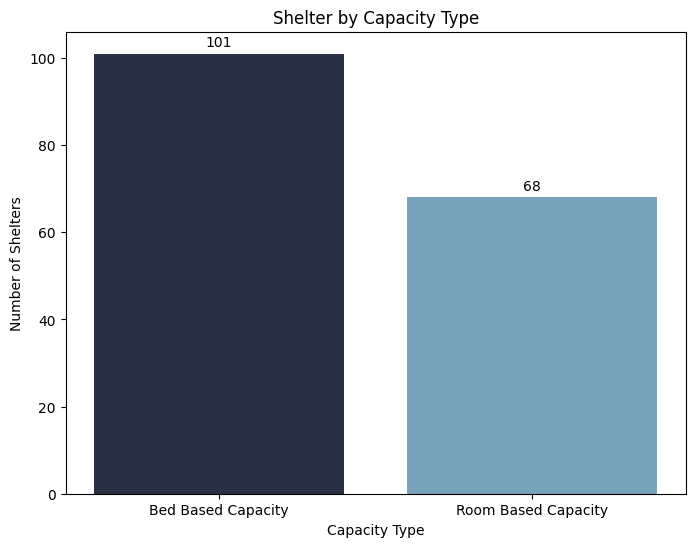

In [21]:
bar_colours = ["#283044", "#78a1bb"]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(capacity_type_count["CAPACITY_TYPE"], capacity_type_count["UNIQUE_COUNT"], color=bar_colours)
ax.bar_label(bars, padding=3)
plt.title("Shelter by Capacity Type")
plt.xlabel("Capacity Type")
plt.ylabel("Number of Shelters")
plt.show()


In [22]:
program_area_count = get_count_unique(df, "PROGRAM_AREA", True, False)
program_area_count["PROGRAM_AREA"] = program_area_count["PROGRAM_AREA"].replace("NA", "Unknown")
program_area_count
# program_area_count = get_count(df, "PROGRAM_AREA", True)
# program_area_count


,PROGRAM_AREA,UNIQUE_COUNT
1,Base Shelter and Overnight Services System,102
2,COVID-19 Response,61
3,Unknown,1
4,Temporary Refugee Response,2
5,Winter Programs,3


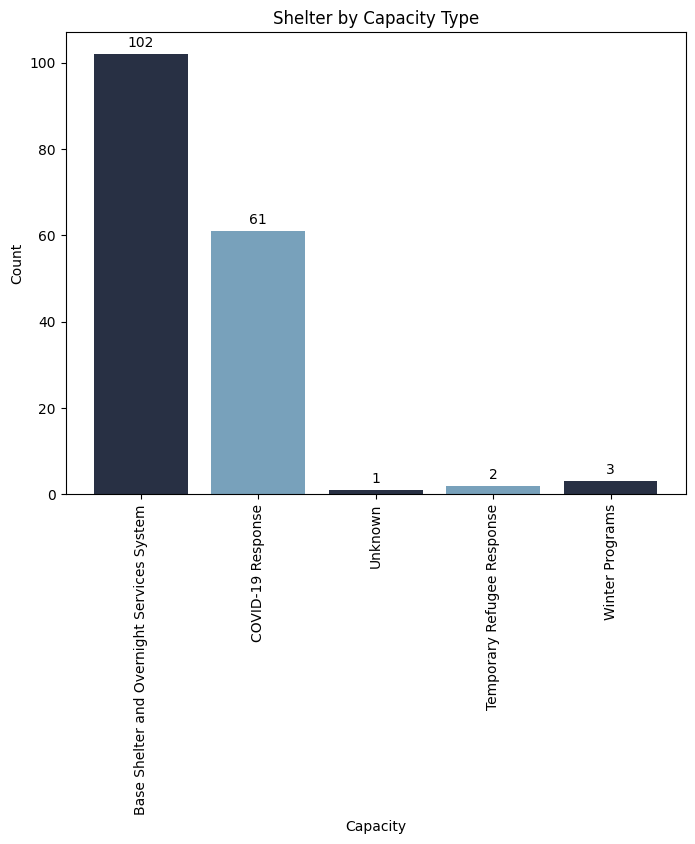

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(program_area_count["PROGRAM_AREA"], program_area_count["UNIQUE_COUNT"], color=bar_colours)
ax.bar_label(bars, padding=3)
plt.title("Shelter by Capacity Type")
plt.xlabel("Capacity")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()


In [24]:
overnight_service_count = get_count_unique(df,"OVERNIGHT_SERVICE_TYPE",True, False)
overnight_service_count


,OVERNIGHT_SERVICE_TYPE,UNIQUE_COUNT
1,24-Hour Respite Site,9
2,24-Hour Women's Drop-in,2
3,Interim Housing,8
4,Isolation/Recovery Site,3
5,Motel/Hotel Shelter,49
6,NA,1
7,Shelter,94
8,Warming Centre,3


## 4. Get SERVICE_USER_COUNT mean by day.

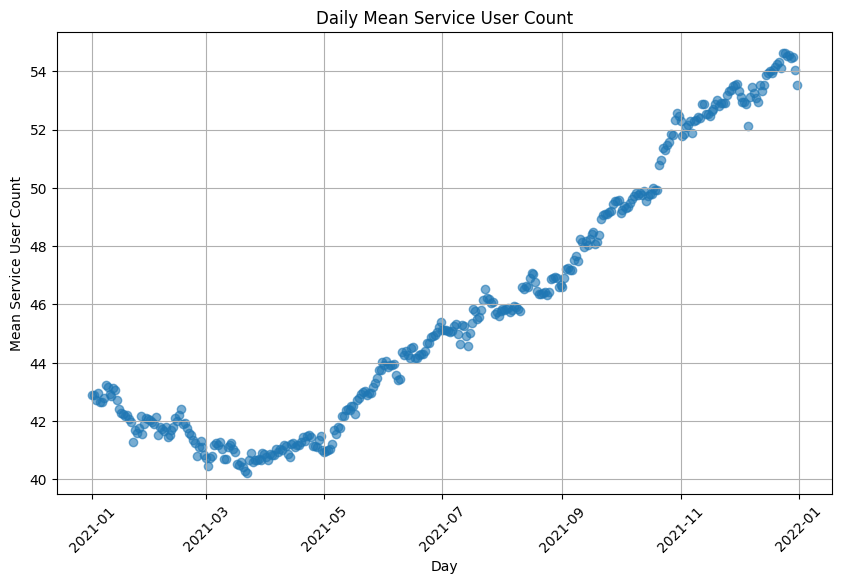

In [25]:
daily_service_users = get_stat_by_date(df, "OCCUPANCY_DATE", "D", "SERVICE_USER_COUNT", "MEAN", "OCCUPANCY_DAY", "DAILY_SERVICE_USER_COUNT_MEAN")


# do not truncate output
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 100)

daily_service_users

plt.figure(figsize=(10, 6))
daily_service_user_dt_fix = daily_service_users
daily_service_user_dt_fix["OCCUPANCY_DAY"] = daily_service_user_dt_fix["OCCUPANCY_DAY"].dt.to_timestamp()
plt.scatter(daily_service_user_dt_fix["OCCUPANCY_DAY"], daily_service_user_dt_fix["DAILY_SERVICE_USER_COUNT_MEAN"], alpha=0.6)
plt.title("Daily Mean Service User Count")
plt.xlabel("Day")
plt.ylabel("Mean Service User Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 5. Get SERVICE_USER_COUNT mean by month.

   OCCUPANCY_MONTH  MONTHLY_SERVICE_USER_COUNT_MEAN
1          2021-01                        42.390565
2          2021-02                        41.647376
3          2021-03                        40.797133
4          2021-04                        41.116493
5          2021-05                        42.430147
6          2021-06                        44.331492
7          2021-07                        45.476257
8          2021-08                        46.390335
9          2021-09                        48.262179
10         2021-10                        50.359524
11         2021-11                        52.678730
12         2021-12                        53.703827


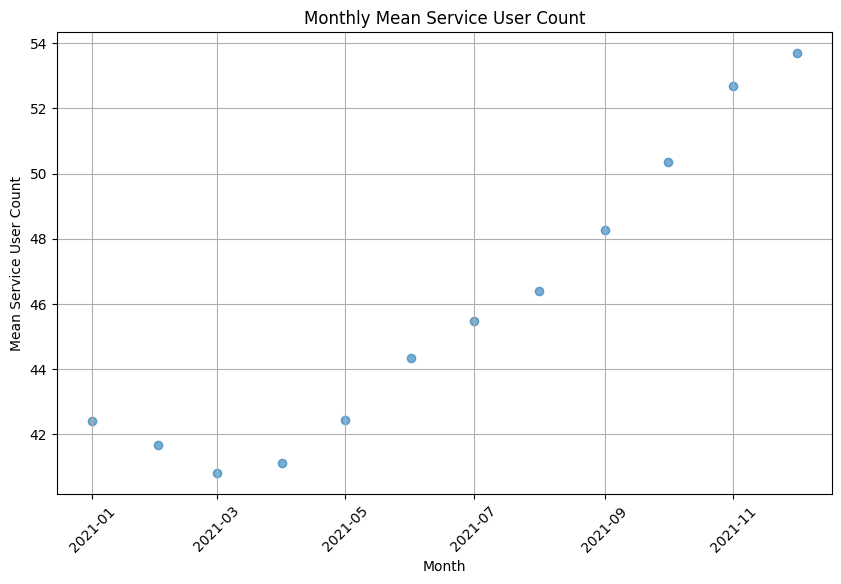

In [26]:
monthly_service_users = get_stat_by_date(df, "OCCUPANCY_DATE", "M", "SERVICE_USER_COUNT", "MEAN", "OCCUPANCY_MONTH", "MONTHLY_SERVICE_USER_COUNT_MEAN")

print(monthly_service_users)

monthly_service_user_fix = monthly_service_users
monthly_service_user_fix["OCCUPANCY_MONTH"] = monthly_service_user_fix["OCCUPANCY_MONTH"].dt.to_timestamp()
plt.figure(figsize=(10, 6))
plt.scatter(monthly_service_users["OCCUPANCY_MONTH"], monthly_service_users["MONTHLY_SERVICE_USER_COUNT_MEAN"], alpha=0.6)
plt.title("Monthly Mean Service User Count")
plt.xlabel("Month")
plt.ylabel("Mean Service User Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 6. Test Quantitative Data for Normality

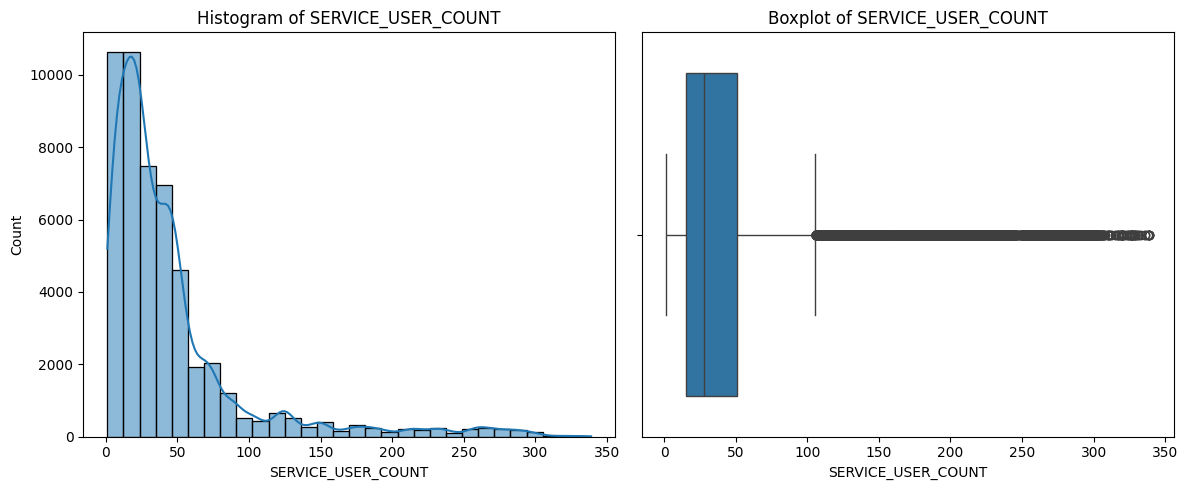

{'Mean': 45.72717101130653,
 'Median': 28.0,
 'Quartile1': 15.0,
 'Quartile3': 51.0,
 'IQR': 36.0}

In [27]:
is_col_normal(df, "SERVICE_USER_COUNT")


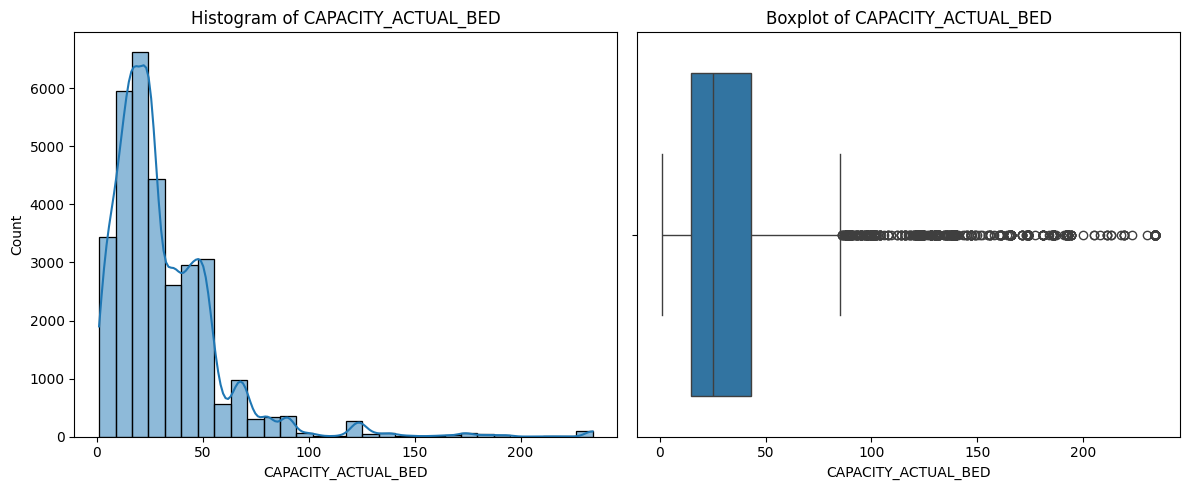

{'Mean': 31.627148986079817,
 'Median': 25.0,
 'Quartile1': 15.0,
 'Quartile3': 43.0,
 'IQR': 28.0}

In [28]:
is_col_normal(df, "CAPACITY_ACTUAL_BED")


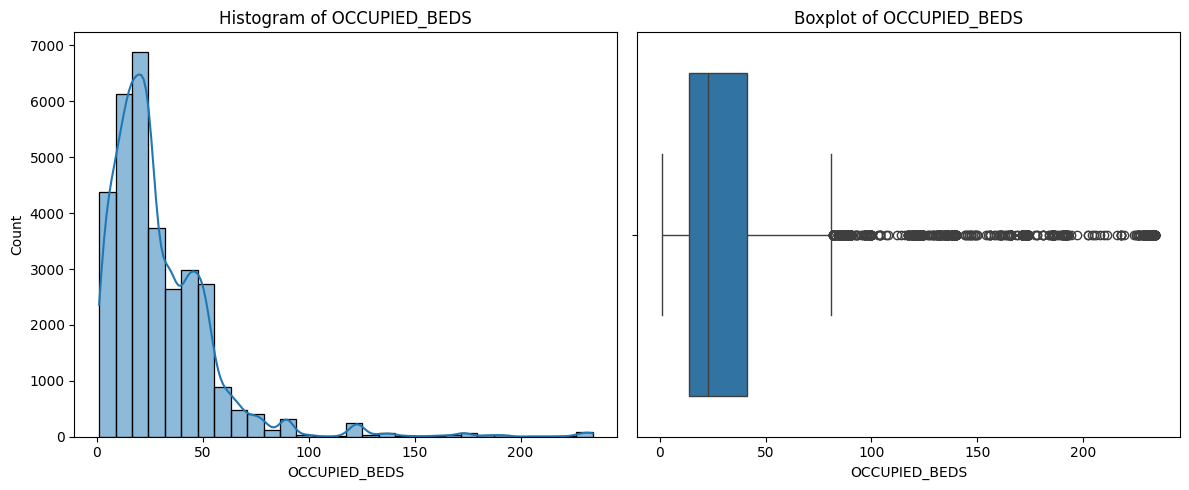

{'Mean': 29.780270996018395,
 'Median': 23.0,
 'Quartile1': 14.0,
 'Quartile3': 41.0,
 'IQR': 27.0}

In [29]:
is_col_normal(df, "OCCUPIED_BEDS")


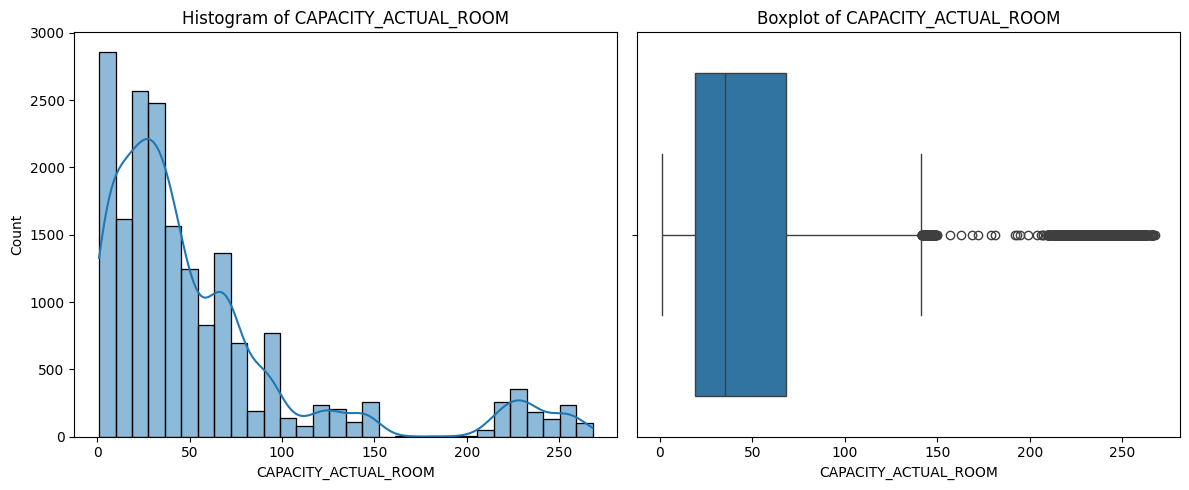

{'Mean': 55.54925856025883,
 'Median': 35.0,
 'Quartile1': 19.0,
 'Quartile3': 68.0,
 'IQR': 49.0}

In [30]:
is_col_normal(df, "CAPACITY_ACTUAL_ROOM")


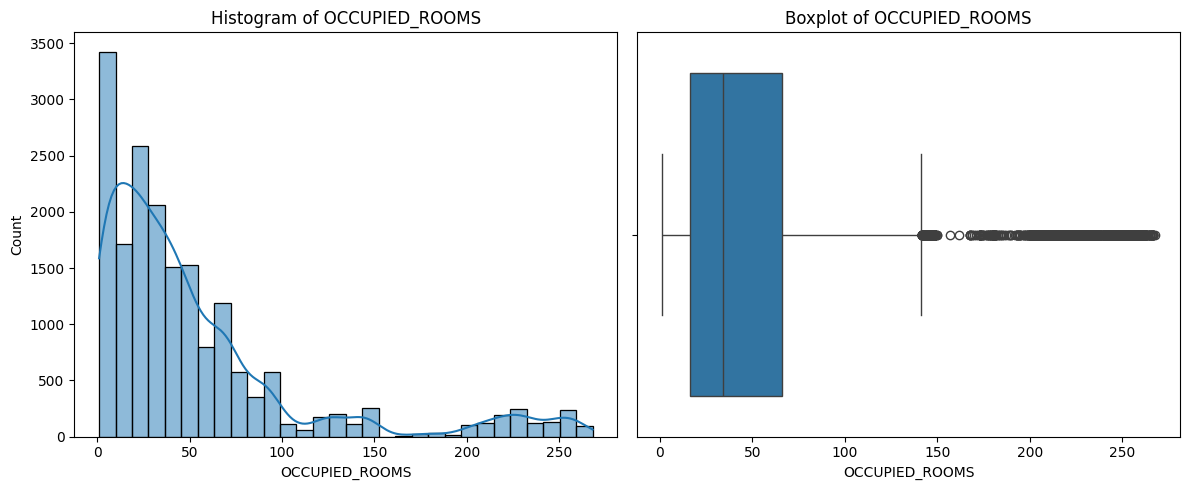

{'Mean': 52.79859800485306,
 'Median': 34.0,
 'Quartile1': 16.0,
 'Quartile3': 66.0,
 'IQR': 50.0}

In [31]:
is_col_normal(df, "OCCUPIED_ROOMS")


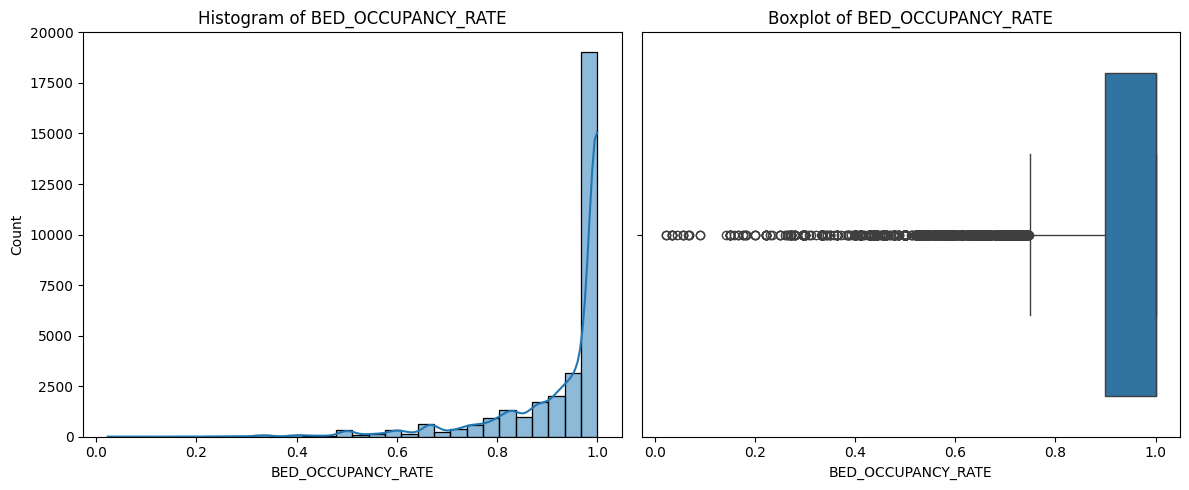

{'Mean': 0.9278845044236499,
 'Median': 1.0,
 'Quartile1': 0.9,
 'Quartile3': 1.0,
 'IQR': 0.09999999999999998}

In [32]:
is_col_normal(df, "BED_OCCUPANCY_RATE")


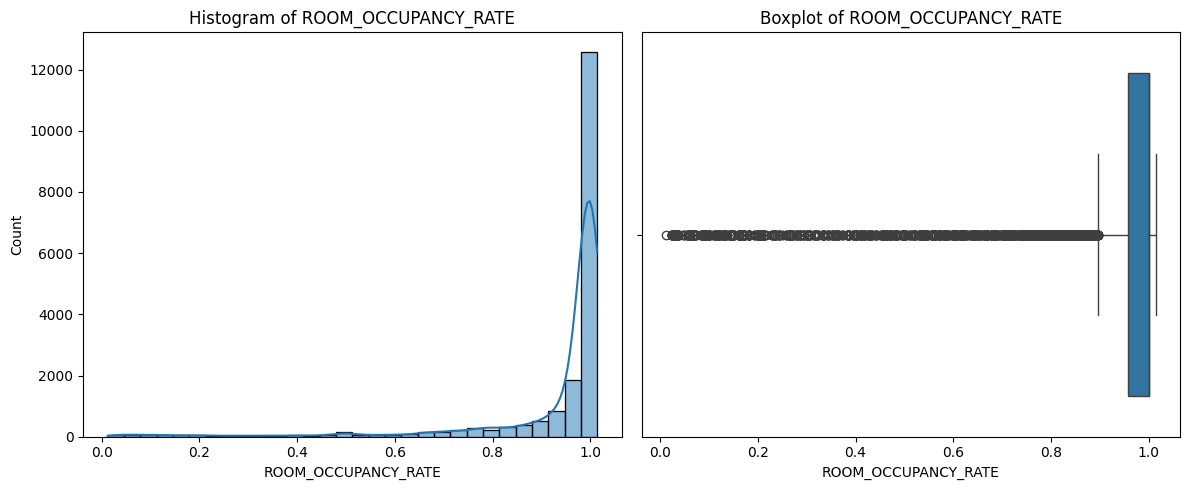

{'Mean': 0.9340865091561475,
 'Median': 1.0,
 'Quartile1': 0.9583333333333334,
 'Quartile3': 1.0,
 'IQR': 0.04166666666666663}

In [33]:
is_col_normal(df, "ROOM_OCCUPANCY_RATE")


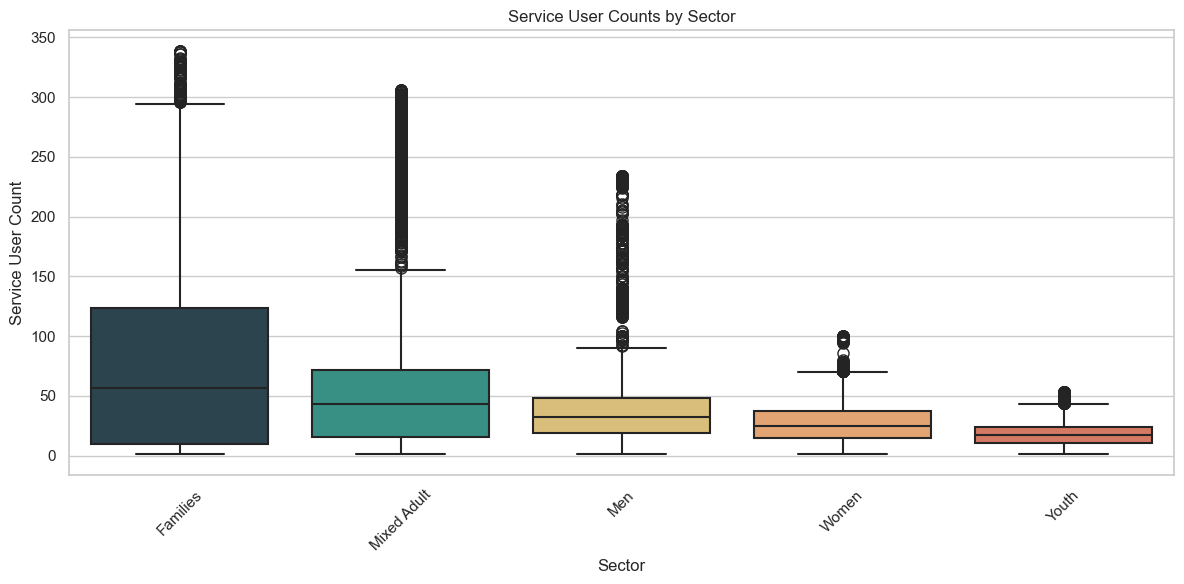

In [34]:
box_plot_colours = {
    "Families": "#264653",
    "Mixed Adult": "#2A9D8F",
    "Men": "#E9C46A",
    "Women":"#F4A261",
    "Youth": "#E76F51"
    }
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x="SECTOR", y="SERVICE_USER_COUNT", hue="SECTOR",
                      data=df, fliersize=8, linewidth=1.5, whis=1.5, palette=box_plot_colours)
boxplot.set_title("Service User Counts by Sector")
boxplot.set_xlabel("Sector")
boxplot.set_ylabel("Service User Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


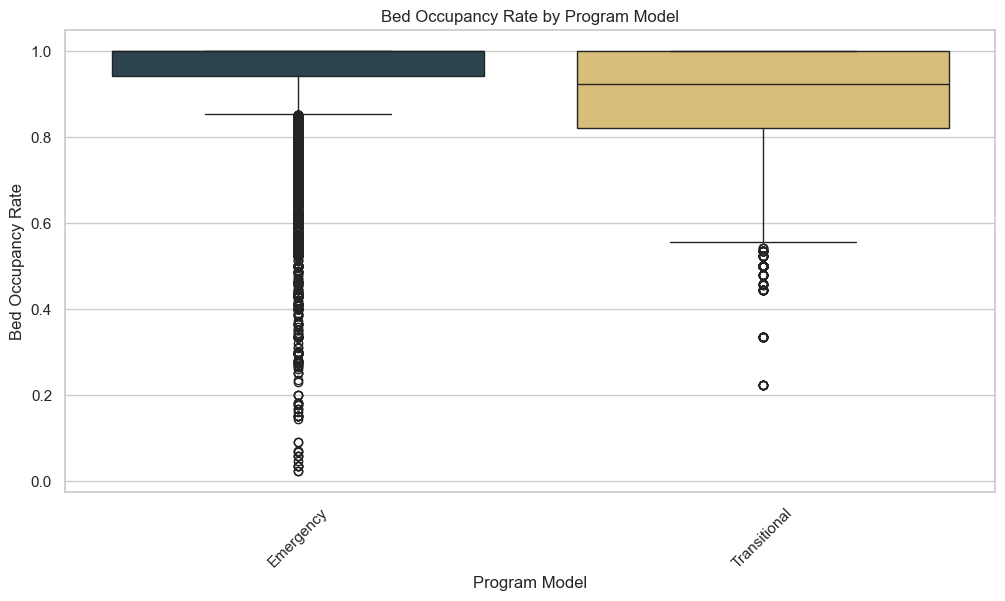

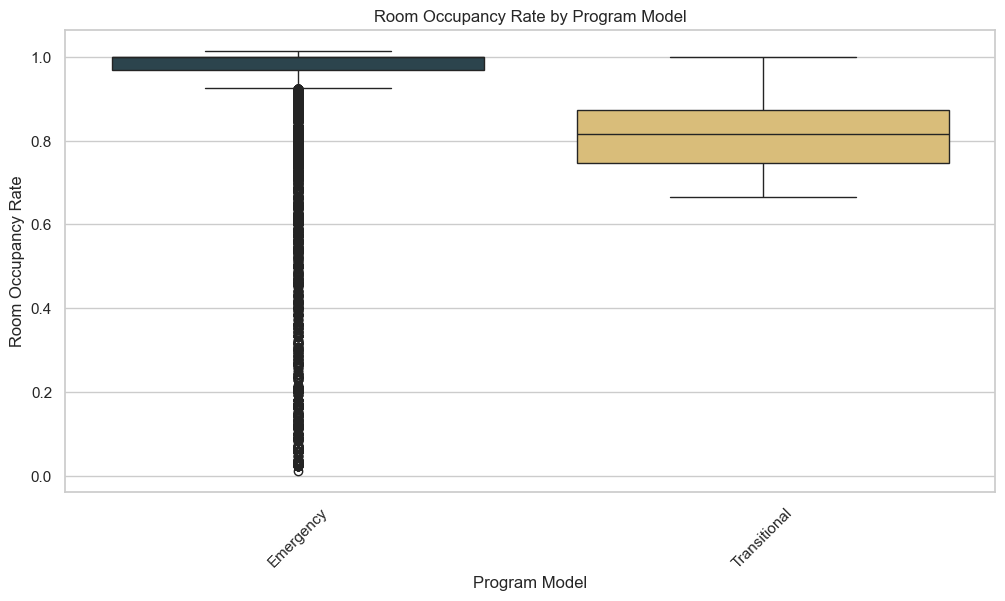

In [35]:
box_plot_colours = {
    "Emergency": "#264653",
    "Transitional": "#E9C46A"
}

# Boxplot for PROGRAM_MODEL vs BED_OCCUPANCY_RATE
plt.figure(figsize=(12, 6))
sns.boxplot(x="PROGRAM_MODEL", y="BED_OCCUPANCY_RATE", hue="PROGRAM_MODEL", data=df, palette=box_plot_colours)
plt.title("Bed Occupancy Rate by Program Model")
plt.xlabel("Program Model")
plt.ylabel("Bed Occupancy Rate")
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.show()

# Boxplot for PROGRAM_MODEL vs ROOM_OCCUPANCY_RATE
plt.figure(figsize=(12, 6))
sns.boxplot(x="PROGRAM_MODEL", y="ROOM_OCCUPANCY_RATE", hue="PROGRAM_MODEL", data=df, palette=box_plot_colours)
plt.title("Room Occupancy Rate by Program Model")
plt.xlabel("Program Model")
plt.ylabel("Room Occupancy Rate")
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.show()


## 7. T-Tests

In [36]:
# t-test comparing the mean number of service user count between families and
# mixed adults.
perform_t_test(df,"SECTOR","SERVICE_USER_COUNT","Families", "Mixed Adult")


{'T-Statistic:': 15.123693016300312, 'P-Value:': 4.687103588715853e-51}

In [37]:
# t-test comparing the means of the bed occupancny rate between emergency and
# transitional program models.
perform_t_test(df, "PROGRAM_MODEL", "BED_OCCUPANCY_RATE", "Emergency", "Transitional")


{'T-Statistic:': 36.78483679745313, 'P-Value:': 7.273950955976339e-283}

In [38]:
# t-test comparing the means of the room occupancny rate between emergency and
# transitional program models.
perform_t_test(df, "PROGRAM_MODEL", "ROOM_OCCUPANCY_RATE", "Emergency", "Transitional")


{'T-Statistic:': 31.71080126309493, 'P-Value:': 4.4252019739840735e-150}